In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import missingno as msno

from xgboost import XGBClassifier
import xgboost as xgb

In [3]:
from category_encoders import TargetEncoder

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.manifold import TSNE


In [5]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [6]:
from pandas_profiling import ProfileReport
import sweetviz as sv

C:\Users\hasan\AppData\Local\Temp\ipykernel_16024\2907769904.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [7]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
0,1,0,6603,W,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1300,NaN
1,2,1,5210,I,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,1570,1800.0
2,3,1,2505,Q,7.0,NaN,NaN,0.0,1000.0,915.0,...,269.0,1004.0,NaN,1000.0,1000.0,1560.0,553.0,1567.0,1450,1450.0
3,4,1,3902,Q,34.0,NaN,NaN,0.0,1000.0,722.0,...,30.0,16.0,NaN,1000.0,1000.0,1301.0,17.0,1301.0,2000,2000.0
4,5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,...,74.0,38.0,NaN,13594.0,16000.0,1518.0,19.0,1389.0,1700,1700.0


In [69]:
df.shape

(5626, 51)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY         5626 non-null   int64  
 1   VAR_TARGET  5626 non-null   int64  
 2   VAR_1       5626 non-null   int64  
 3   VAR_2       5626 non-null   object 
 4   VAR_3       5622 non-null   float64
 5   VAR_4       4344 non-null   float64
 6   VAR_5       4344 non-null   float64
 7   VAR_6       5612 non-null   float64
 8   VAR_7       5612 non-null   float64
 9   VAR_8       5612 non-null   float64
 10  VAR_9       5612 non-null   float64
 11  VAR_10      5612 non-null   float64
 12  VAR_11      5316 non-null   float64
 13  VAR_12      5626 non-null   int64  
 14  VAR_13      4528 non-null   float64
 15  VAR_14      4528 non-null   float64
 16  VAR_15      1801 non-null   float64
 17  VAR_16      5598 non-null   object 
 18  VAR_17      5508 non-null   float64
 19  VAR_18      5612 non-null  

In [10]:
df.describe()

,KEY,VAR_TARGET,VAR_1,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
count,5626.000000,5626.000000,5626.000000,5622.000000,4344.000000,4344.000000,5612.000000,5612.000000,5612.000000,5612.000000,...,5621.000000,5621.000000,34.000000,5612.000000,4528.000000,1814.000000,5621.000000,2306.000000,5.626000e+03,3362.000000
mean,2813.500000,0.043726,3257.151973,33.639808,6513.402164,3401.622238,0.617962,9748.699572,4144.263899,1148.589095,...,2195.338730,2199.308842,3611.764706,4129.482359,2299.436617,2401.598126,2149.124177,1897.083261,6.115745e+03,3508.943783
std,1624.230638,0.204502,888.997086,5.607477,7635.750969,4629.699543,1.368544,16482.921883,8517.336280,2160.342345,...,15104.976409,15096.942980,2696.766561,4737.091335,3525.160200,2180.234920,15469.080255,1818.558706,8.491456e+04,6886.322041
min,1.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1300.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000e+00,500.000000
25%,1407.250000,0.000000,2606.000000,34.000000,2000.000000,800.000000,0.000000,2000.000000,616.500000,160.000000,...,0.000000,0.000000,2084.500000,1201.500000,0.000000,1364.000000,0.000000,893.000000,1.650000e+03,1774.750000
50%,2813.500000,0.000000,3103.000000,34.000000,4050.000000,1800.000000,0.000000,5000.000000,2051.000000,582.000000,...,2.000000,12.000000,2985.000000,2650.000000,1000.000000,1855.500000,18.000000,1541.500000,2.500000e+03,2500.000000
75%,4219.750000,0.000000,3707.000000,34.000000,7900.000000,4200.000000,1.000000,11062.500000,4715.750000,1331.000000,...,238.000000,304.000000,3800.000000,5200.000000,3000.000000,2909.000000,328.000000,2449.000000,3.500000e+03,3600.000000
max,5626.000000,1.000000,7011.000000,81.000000,81500.000000,45000.000000,31.000000,304800.000000,178711.000000,50203.000000,...,529716.000000,543328.000000,15000.000000,43700.000000,50000.000000,55594.000000,561609.000000,29422.000000,4.200000e+06,220000.000000


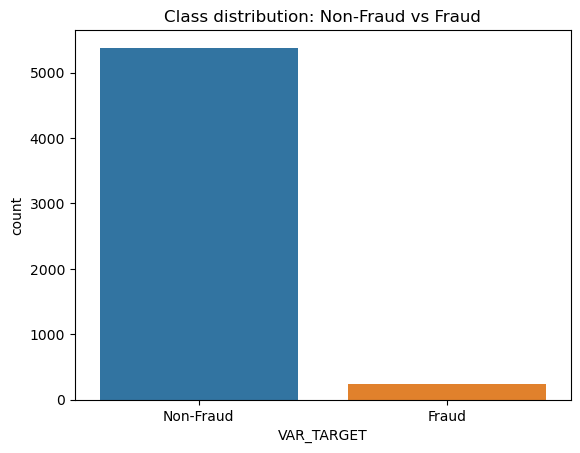

In [77]:
plt.figure()
sns.countplot(data = df, x = df.VAR_TARGET)
plt.xticks(np.arange(2), ['Non-Fraud', 'Fraud'])
plt.title('Class distribution: Non-Fraud vs Fraud')
plt.show();

In [11]:
# profileReport = ProfileReport(df)
# profileReport.to_file(output_file='ccFraudDetection_Report.html')

In [12]:
X = df.drop(['VAR_TARGET','KEY'], axis=1)  
y = df['VAR_TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [13]:
X_train

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
4299,2505,Q,34.0,1200.0,729.0,2.0,1929.0,1917.0,300.0,100.0,...,314.0,116.0,NaN,965.0,0.0,1706.0,58.0,1707.0,1701,1701.0
2519,2402,Q,34.0,1800.0,1800.0,0.0,2800.0,1056.0,1290.0,0.0,...,352.0,348.0,NaN,1400.0,1000.0,NaN,3388.0,415.0,1850,1850.0
2985,3204,Q,34.0,300.0,300.0,0.0,1300.0,740.0,109.0,0.0,...,2084.0,739.0,NaN,650.0,1000.0,2010.0,406.0,1005.0,2500,2500.0
523,3603,I,34.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,3000,NaN
3391,3507,Q,34.0,NaN,NaN,0.0,5000.0,3094.0,2622.0,0.0,...,0.0,157.0,NaN,5000.0,5000.0,3652.0,86.0,3653.0,4500,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2203,W,34.0,11750.0,11750.0,0.0,11750.0,450.0,324.0,0.0,...,0.0,0.0,NaN,11750.0,NaN,NaN,0.0,NaN,3000,NaN
291,2511,Q,34.0,11750.0,1100.0,4.0,25650.0,0.0,11227.0,0.0,...,0.0,0.0,NaN,5130.0,1600.0,NaN,0.0,NaN,60000,60000.0
4758,3611,Q,34.0,3000.0,800.0,0.0,5828.0,3550.0,700.0,968.0,...,125.0,61.0,NaN,1943.0,0.0,1871.0,38.0,2748.0,1900,1900.0
5303,3511,W,34.0,750.0,750.0,0.0,750.0,746.0,336.0,0.0,...,0.0,0.0,NaN,750.0,NaN,NaN,0.0,NaN,1350,1350.0


In [14]:
X_test

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
393,2502,Q,34.0,600.0,600.0,0.0,13850.0,3458.0,1762.0,0.0,...,28946.0,27624.0,NaN,6925.0,13250.0,NaN,15140.0,NaN,2200,2200.0
2012,5811,S,34.0,8750.0,2850.0,0.0,20650.0,14744.0,1010.0,2265.0,...,0.0,0.0,NaN,5163.0,0.0,NaN,0.0,NaN,3400,3400.0
2257,4303,W,34.0,4900.0,4900.0,1.0,4900.0,1587.0,41.0,0.0,...,0.0,0.0,NaN,4900.0,NaN,NaN,0.0,NaN,2780,NaN
2948,3908,Q,34.0,1600.0,1600.0,0.0,6200.0,4950.0,1481.0,0.0,...,5.0,202.0,NaN,3100.0,4600.0,1560.0,512.0,1560.0,2800,2800.0
281,2909,Q,34.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,...,83.0,86.0,NaN,0.0,0.0,NaN,47.0,NaN,1300,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,3204,I,34.0,17600.0,1400.0,2.0,55440.0,21997.0,2160.0,930.0,...,0.0,0.0,NaN,9240.0,3150.0,NaN,0.0,NaN,15000,NaN
5609,3011,Q,34.0,3450.0,1000.0,1.0,7950.0,4156.0,900.0,0.0,...,0.0,0.0,NaN,1988.0,0.0,NaN,0.0,NaN,1800,2080.0
1267,2010,W,34.0,500.0,500.0,0.0,500.0,322.0,105.0,0.0,...,0.0,0.0,NaN,500.0,NaN,NaN,0.0,NaN,800,NaN
2497,2706,Q,34.0,NaN,NaN,0.0,3500.0,0.0,0.0,0.0,...,0.0,24.0,NaN,3500.0,3500.0,1586.0,264.0,1125.0,1600,1600.0


In [15]:
y_train.sum()

197

In [16]:
y_test.sum()

49

In [17]:
# my_report = sv.analyze(df)
# my_report.show_html("ccFraudDetection_Sweetviz.html") 

In [19]:
missingValues = df.isna().sum().sort_values(ascending=False)

In [56]:
greaterThan95 = missingValues[missingValues / len(df) * 100 > 95]
    
greaterThan50AndLessThan95 = missingValues[(missingValues / len(df) * 100 > 50) & (missingValues / len(df) * 100 < 95)]
    
greaterThan25AndLessThan50 = missingValues[(missingValues / len(df) * 100 > 25) & (missingValues / len(df) * 100 < 50)]
    
greaterThan5AndLessThan25 = missingValues[(missingValues / len(df) * 100 > 5) & (missingValues / len(df) * 100 < 25)]
    
lessThan5 = missingValues[missingValues / len(df) * 100 < 5]

In [48]:
greaterThan50AndLessThan95

VAR_40    4113
VAR_15    3825
VAR_33    3825
VAR_32    3825
VAR_46    3812
VAR_48    3320
dtype: int64

In [52]:
# VAR_40  Cont
# VAR_15  Cont
# VAR_33  Nom  
# VAR_32  Cont
# VAR_46  Cont
# VAR_48  Cont

In [50]:
greaterThan25AndLessThan50

VAR_50    2264
dtype: int64

In [51]:
# VAR_50  Cont

In [53]:
greaterThan5AndLessThan25

VAR_26    1349
VAR_4     1282
VAR_5     1282
VAR_45    1098
VAR_13    1098
VAR_14    1098
VAR_22     924
VAR_11     310
dtype: int64

In [54]:
# VAR_26  Card
# VAR_4   Cont
# VAR_5   Cont
# VAR_45  Cont
# VAR_13  Cont
# VAR_14  Cont
# VAR_22  Ord 
# VAR_11  Nom

In [55]:
lessThan5

VAR_38        179
VAR_17        118
VAR_23         48
VAR_16         28
VAR_9          14
VAR_6          14
VAR_30         14
VAR_29         14
VAR_7          14
VAR_8          14
VAR_44         14
VAR_10         14
VAR_21         14
VAR_20         14
VAR_18         14
VAR_19         14
VAR_31         11
VAR_47          5
VAR_42          5
VAR_35          5
VAR_41          5
VAR_3           4
VAR_39          0
VAR_49          0
KEY             0
VAR_37          0
VAR_36          0
VAR_34          0
VAR_28          0
VAR_27          0
VAR_TARGET      0
VAR_24          0
VAR_12          0
VAR_2           0
VAR_1           0
VAR_25          0
dtype: int64

In [64]:
df = df.drop(greaterThan95.keys(), axis=1)

In [65]:
df

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_40,VAR_41,VAR_42,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
0,1,0,6603,W,34.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1300,NaN
1,2,1,5210,I,34.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1570,1800.0
2,3,1,2505,Q,7.0,NaN,NaN,0.0,1000.0,915.0,...,5594.0,269.0,1004.0,1000.0,1000.0,1560.0,553.0,1567.0,1450,1450.0
3,4,1,3902,Q,34.0,NaN,NaN,0.0,1000.0,722.0,...,NaN,30.0,16.0,1000.0,1000.0,1301.0,17.0,1301.0,2000,2000.0
4,5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,...,18000.0,74.0,38.0,13594.0,16000.0,1518.0,19.0,1389.0,1700,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,5622,0,2209,Q,34.0,NaN,NaN,0.0,1000.0,635.0,...,1717.0,704.0,898.0,1000.0,1000.0,1301.0,1008.0,905.0,1300,1300.0
5622,5623,0,4304,I,64.0,40000.0,225.0,0.0,142425.0,3329.0,...,NaN,2258.0,952.0,17803.0,7000.0,NaN,719.0,NaN,8500,8500.0
5623,5624,0,2704,Q,34.0,NaN,NaN,3.0,3500.0,0.0,...,NaN,7.0,7.0,3500.0,3500.0,NaN,6.0,NaN,2800,2800.0
5624,5625,0,2209,Q,41.0,NaN,NaN,0.0,0.0,0.0,...,NaN,316.0,1633.0,0.0,0.0,1971.0,1259.0,2101.0,2000,2000.0
